Using TensorFlow backend.


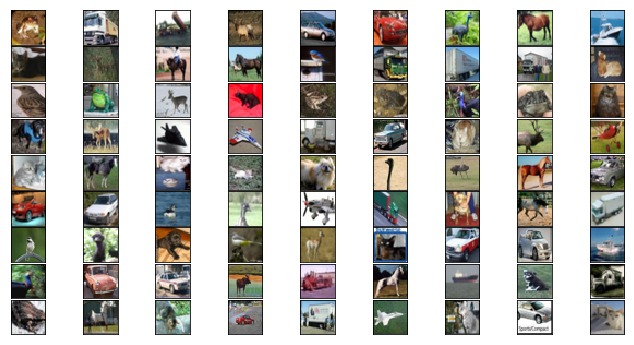

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [2]:
from keras.utils import np_utils
nb_classes = 10

# 画像を1次元配列化
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(50000, 'train samples')
(10000, 'test samples')


In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
model = Sequential()


model.add(Dense(512, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

In [8]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 32
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=2)


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
9s - loss: 1.7486 - acc: 0.3810 - val_loss: 1.9456 - val_acc: 0.3140
Epoch 2/20
8s - loss: 1.6015 - acc: 0.4317 - val_loss: 1.9917 - val_acc: 0.3240
Epoch 3/20
8s - loss: 1.5290 - acc: 0.4568 - val_loss: 1.5964 - val_acc: 0.4350
Epoch 4/20
8s - loss: 1.4763 - acc: 0.4738 - val_loss: 1.5460 - val_acc: 0.4646
Epoch 5/20
8s - loss: 1.4394 - acc: 0.4882 - val_loss: 1.5464 - val_acc: 0.4554
Epoch 6/20
8s - loss: 1.4063 - acc: 0.4999 - val_loss: 1.4767 - val_acc: 0.4818
Epoch 7/20
8s - loss: 1.3738 - acc: 0.5100 - val_loss: 1.4113 - val_acc: 0.5002
Epoch 8/20
8s - loss: 1.3473 - acc: 0.5222 - val_loss: 1.6192 - val_acc: 0.4498
Epoch 9/20
8s - loss: 1.3260 - acc: 0.5296 - val_loss: 1.4481 - val_acc: 0.4816
Epoch 10/20
8s - loss: 1.3029 - acc: 0.5365 - val_loss: 1.5033 - val_acc: 0.4658
Epoch 11/20
8s - loss: 1.2808 - acc: 0.5432 - val_loss: 1.3664 - val_acc: 0.5150
Epoch 12/20
8s - loss: 1.2596 - acc: 0.5513 - val_loss: 1.4767 - val_

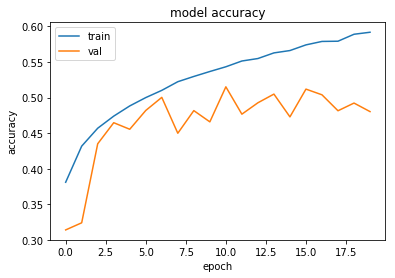

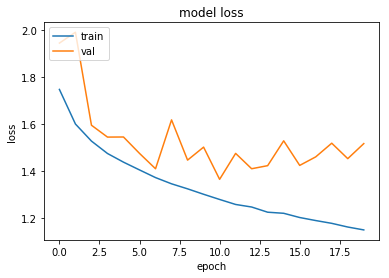

In [10]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.4785


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[677  61  14  38  10  17   8  82  40  53]
 [ 56 643   4  23   6  12   8  52  26 170]
 [123  35 218 124  84  93  57 227  10  29]
 [ 43  39  28 387  33 211  58 142  14  45]
 [ 80  16  74  85 328  57  66 253  13  28]
 [ 29  19  24 250  37 391  29 172  16  33]
 [ 23  29  52 169  91  84 421  94   8  29]
 [ 42  20   6  62  23  68   9 711   5  54]
 [214 101   1  44   8  20   3  53 463  93]
 [ 79 210   5  34   3  17  11  71  24 546]]
             precision    recall  f1-score   support

          0       0.50      0.68      0.57      1000
          1       0.55      0.64      0.59      1000
          2       0.51      0.22      0.31      1000
          3       0.32      0.39      0.35      1000
          4       0.53      0.33      0.40      1000
          5       0.40      0.39      0.40      1000
          6       0.63      0.42      0.50      1000
          7       0.38      0.71      0.50      1000
          8       0.75      0.46      0.57      1000
          9       0.51      0.55      